# Hackathon 1: descriptive statistics, estimation and bootstrapping

This project illustrates the course LEPL1109 with an industrial applications of statistics. You will analyse the performance of wind farms located in the Walloon Brabant near Beauvechain and in the high Fens, close to Elsenborn. Each wind farm exploits 8 wind turbines. The kinetic power, noted Pk, (in watt) of one wind turbine is calculated with the formula 

Pk (W) = 0.5 x Rho x S x V^3

Where 

S   : is the surface of the circle in square meters with a radius equal to the length of blades (32 m).
Rho : is the air density (“masse volumique”). We consider here an average value of 1.2 kg/m^3
V   : is the speed of wind in m/s.

According to the Betz limit, only 59.3% of the kinetic energy from wind can be used to spin the turbine and generate electricity. In reality, turbines cannot reach the Betz limit, and the efficiency is estimated to 42% of the kinetic power. One wind turbine generates an electric power Pe = 0.42 x Pk. 

The wind turbins are stopped if the wind speed is above 90 km/h.

The file “BeauvechainWind.csv” and “Elsenborn.csv” contains the average daily wind speeds, measured in km/h, at Beauvechain and  Elsenborn (source www. https://www.ecad.eu/)

FILE FORMAT (MISSING VALUE CODE IS -9999):
01-06 SOUID: Source identifier
08-15 DATE : Date YYYYMMDD
17-21 FG   : wind speed in 0.1 m/s
23-27 Q_FG : Quality code for FG (0='valid'; 1='suspect'; 9='missing')


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Théodore Cousin (NOMA: 47202000)

Part. 2: Diego Troch (NOMA: 07252000)

Part. 3: Alexandre Kneip (NOMA: 57132000)

Part. 4: Samuel Jacquet (NOMA: 6316200)

Part. 4: Thomas Rixen (NOMA: 14632000)


# Hackathon 1: descriptive statistics, estimation and bootstrapping

This project illustrates the course LEPL1109 with an industrial applications of statistics. You will analyse the performance of wind farms located in the Walloon Brabant near Beauvechain and in the high Fens, close to Elsenborn. Each wind farm exploits 8 wind turbines. The kinetic power, noted Pk, (in watt) of one wind turbine is calculated with the formula 

Pk (W) = 0.5 x Rho x S x V^3

Where 

S   : is the surface of the circle in square meters with a radius equal to the length of blades (32 m).
Rho : is the air density (“masse volumique”). We consider here an average value of 1.2 kg/m^3
V   : is the speed of wind in m/s.

According to the Betz limit, only 59.3% of the kinetic energy from wind can be used to spin the turbine and generate electricity. In reality, turbines cannot reach the Betz limit, and the efficiency is estimated to 42% of the kinetic power. One wind turbine generates an electric power Pe = 0.42 x Pk. 

The wind turbins are stopped if the wind speed is above 90 km/h.

The file “BeauvechainWind.csv” and “Elsenborn.csv” contains the average daily wind speeds, measured in km/h, at Beauvechain and  Elsenborn (source www. https://www.ecad.eu/)

FILE FORMAT (MISSING VALUE CODE IS -9999):
01-06 SOUID: Source identifier
08-15 DATE : Date YYYYMMDD
17-21 FG   : wind speed in 0.1 m/s
23-27 Q_FG : Quality code for FG (0='valid'; 1='suspect'; 9='missing')


## Report content

•	Grades are granted to the members whose names are in the Jupyter notebook. If your name doesn’t appear on the top of the notebook, you’ll get a 0, even though you are in a group on Moodle.

•	The jupyter notebook must be compiled with printed results and next submitted via moodle. The absence of compiled results (or non-printed values) leads to a lower grade.

## Report submission

•	Deadline, see moodle website. Submission after the deadline will not be accepted.

•	To submit your report, go to the section “APP” on Moodle and the subsection “Soumission du rapport”. You can upload your work there. Once you are sure that it is your final version, click the button “Envoyer le devoir”. It is important that you don’t forget to click on this button ! 

•	Reports that have not been uploaded through Moodle will not be corrected.


## Names and Noma of participants:

Part. 1: Théodore Cousin (NOMA: 47202000)

Part. 2: Diego Troch (NOMA: 07252000)

Part. 3: Alexandre Kneip (NOMA: 57132000)

Part. 4: Samuel Jacquet (NOMA: 6316200)

Part. 4: Thomas Rixen (NOMA: 14632000)


------------------------------------------------------------------------------------------------------
1.	Write a function computing the electric power capacity (in Mega Watts = 10^6 W), for the two wind farms using wind data from the 1/1/2017 to the 1/1/2021

•	Do not forget to set the production to zero if the wind speed is above 90 km. 

•	Take care to converts units.

•	Remove all days with missing data (error code 1 or 9) for Beauvechain or Elsenborn

------------------------------------------------------------------------------------------------------

In [1]:
#imports
import math
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

def ElecPowerCapa():
    
    #only keep date from 20170101 to 20210101 for Beauvechain
    Beauvechain = pd.read_csv("Beauvechain.csv", sep=",")
    Beauvechain=Beauvechain.loc[Beauvechain["    DATE"] >= 20170101].loc[Beauvechain["    DATE"] <= 20210101]

    #only keep date from 20170101 to 20210101 for Elsenborn
    Elsenborn = pd.read_csv("Elsenborn.csv", sep=",")
    Elsenborn=Elsenborn.loc[Elsenborn["    DATE"] >= 20170101].loc[Elsenborn["    DATE"] <= 20210101]

    #Only keep the trusted value
    for (i,j) in zip(Beauvechain.iterrows(), Elsenborn.iterrows()):
        errorB=i[1][3]
        errorE=j[1][3]
        if errorB != 0: j[1][3]=1
        if errorE != 0: i[1][3]=1

    Beauvechain=Beauvechain.loc[Beauvechain[" Q_FG"] == 0]
    Elsenborn=Elsenborn.loc[Elsenborn[" Q_FG"] == 0]

    #if the wind speed is higher than 90km/h then set the value in the table to 0
    #and if the wind speed is negative, then delete the line from the file
    Elsenborn=Elsenborn.loc[Elsenborn["   FG"] >=0]
    Elsenborn.loc[Elsenborn["   FG"] > 90, "   FG"] = 0 
    Beauvechain=Beauvechain.loc[Beauvechain["   FG"] >=0]
    Beauvechain.loc[Beauvechain["   FG"] > 90, "   FG"] = 0

    #constant variables
    PI = math.pi
    RHO = 1.2
    S = (32**2)*PI
    
    #variables
    ResBeauvechain=[]
    ResElsenborn=[]

    # for each day speed in Elsenborn, append the electric power in the final result
    for i in Elsenborn["   FG"]:
        wSpeed = (i/3.6)**3
        Pk=8*0.5*RHO*S*wSpeed
        Pe = Pk*0.42 #because of the betz limit
        Pe = Pe/(10**6) #convert  in MW
        ResElsenborn.append(Pe) 

    for i in Beauvechain["   FG"]:
        wSpeed = (i/3.6)**3
        Pk=8*0.5*RHO*S*wSpeed
        Pe = Pk*0.42 #because of the betz limit
        Pe = Pe/(10**6) #convert  in MW
        ResBeauvechain.append(Pe) 

    #adds the value from beauvechain and elsenborn one by one
    #power measured in W
    FinalRes = (ResElsenborn, ResBeauvechain)
    return FinalRes

Comment briefly your results



------------------------------------------------------------------------------------------------------------------------

2.	Plot histograms and box plots of electric power capacity (MW) from the 1/1/2017 to the 1/1/2021 (both sites). 

------------------------------------------------------------------------------------------------------------------------

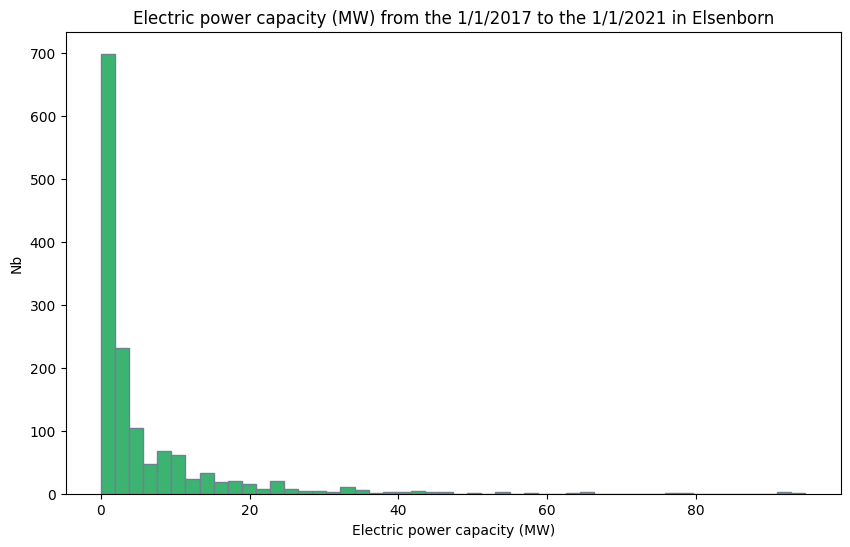

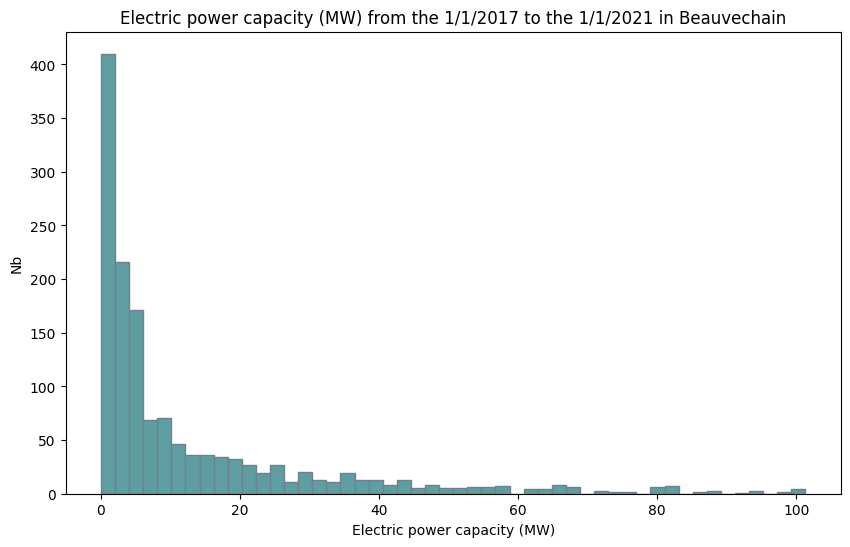

In [2]:
r = ElecPowerCapa()
Results=r[0]+r[1]
r1=r[0]
r2=r[1]

fig1, ax1 = plt.subplots(figsize=(10, 6))
plt.hist(r1, bins=50, color="mediumseagreen", edgecolor="slategrey")
plt.xlabel("Electric power capacity (MW)")
plt.ylabel("Nb") 
plt.title("Electric power capacity (MW) from the 1/1/2017 to the 1/1/2021 in Elsenborn")
plt.show()

fig2, ax2 = plt.subplots(figsize=(10, 6))
plt.hist(r2, bins=50, color="cadetblue", edgecolor="slategrey")
plt.xlabel("Electric power capacity (MW)")
plt.ylabel("Nb") 
plt.title("Electric power capacity (MW) from the 1/1/2017 to the 1/1/2021 in Beauvechain")
plt.show()

------------------------------------------------------------------------------------------------------

3.	Compare the following statistics of both sites and draw a first conclusions

•	Average and median powers for each farm (MW)

•	Standard deviations of powers, for each farm (MW)

•	5% and 95% percentiles of powers, for each farm (MW)

The average and standard deviation of the total power capacities (Beauvechain + Elsenborn).

------------------------------------------------------------------------------------------------------

In [3]:
Results=ElecPowerCapa()
x_e=r1
x_b=r2
x_global=x_b+x_e

x_b.sort()
x_e.sort()
x_global.sort()

XB_DATA = np.array(x_b)
XE_DATA = np.array(x_e)
XGLOBAL_DATA = np.array(x_global)

# mean
mean_b = XB_DATA.mean()
mean_e = XE_DATA.mean()
mean_global = XGLOBAL_DATA.mean()

# median
median_b = XB_DATA[len(XB_DATA)//2]
median_e = XE_DATA[len(XE_DATA)//2]
median_global = XGLOBAL_DATA[len(XGLOBAL_DATA)//2]

# standard deviation
std_dev_b = XB_DATA.std()
std_dev_e = XE_DATA.std()
std_dev_global = XGLOBAL_DATA.std()

# 95% percentile
quantile_95_b = np.quantile(XB_DATA, 0.95)
quantile_95_e = np.quantile(XE_DATA, 0.95)
quantile_95_global = np.quantile(XGLOBAL_DATA, 0.95)

# 5% percentile
quantile_05_b = np.quantile(XB_DATA, 0.05)
quantile_05_e = np.quantile(XE_DATA, 0.05)
quantile_05_global = np.quantile(XGLOBAL_DATA, 0.05)

# answer >> output
print("=====================================================================")
print(f"Beauvechain:\nmean: {mean_b} MW\nmedian: {median_b} MW\nstandard daviation: {std_dev_b} MW\n5% percentile: {quantile_05_b} MW\n95% percentile: {quantile_95_b} MW")
print("=====================================================================\n")
print("=====================================================================")
print(f"Elsenborn:\nmean: {mean_e} MW\nmedian: {median_e} MW\nstandard daviation: {std_dev_e} MW\n5% percentile: {quantile_05_e} MW\n95% percentile: {quantile_95_e} MW")
print("=====================================================================\n")
print("=====================================================================")
print(f"Global:\nmean: {mean_global} MW\nstandard daviation: {std_dev_global} MW")
print("=====================================================================\n")

Beauvechain:
mean: 12.887381751281266 MW
median: 4.995450667263333 MW
standard daviation: 18.430456924317376 MW
5% percentile: 0.2402019855032707 MW
95% percentile: 54.0756109922025 MW

Elsenborn:
mean: 5.650137802821235 MW
median: 1.9216158840261657 MW
standard daviation: 9.762008248900587 MW
5% percentile: 0.10133521263419236 MW
95% percentile: 23.127086422515433 MW

Global:
mean: 9.268759777051251 MW
standard daviation: 15.184982671631241 MW



Comment briefly your results




------------------------------------------------------------------------------------------------------
4.	Fit Gamma and Inverse Gaussian distributions to wind speeds (in Km/h) in Beauvechain and Elsenborn. Estimate their parameters by log-likelihood maximization (MLE). Which distribution is the best one? Compare the histograms of winds with the fitted pdf’s on the same plot.
------------------------------------------------------------------------------------------------------

Gamma fit curve parameters for Beauvechain:
alpha = 3.9946227318786836
beta = 9.82485290811987



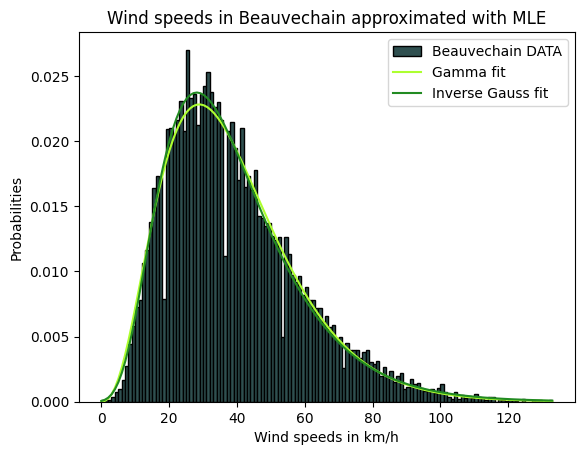

Gamma fit curve parameters for Elsenborn:
alpha = 3.705016224244196
beta = 8.390079052835503



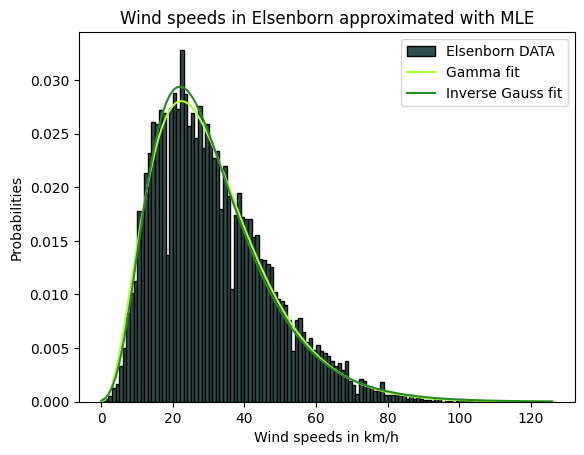

In [4]:
#only keep date from 20170101 to 20210101 for Beauvechain

Beauvechain = pd.read_csv("Beauvechain.csv", sep=",")

#only keep date from 20170101 to 20210101 for Elsenborn
Elsenborn = pd.read_csv("Elsenborn.csv", sep=",")

#remove negative wind speeds
Elsenborn=Elsenborn.loc[Elsenborn["   FG"] >= 0]
Beauvechain=Beauvechain.loc[Beauvechain["   FG"] >= 0]


#put all the non trusted value (!= 0) in ErrorsElsenborn and ErrorsBeauvechain
ErrorsElsenborn=Elsenborn.loc[Elsenborn[" Q_FG"] != 0]
ErrorsBeauvechain=Beauvechain.loc[Beauvechain[" Q_FG"] != 0]

#only keep the wind speed values
WindBeauvechain = np.array(Beauvechain["   FG"])
WindElsenborn = np.array(Elsenborn["   FG"])

def getDistributionParameters(windFarmWinds):

    #Gamma distribution
    #takes gamma parameters
    alpha, gammaLoc, scaleGamma = stats.gamma.fit(windFarmWinds)

    #Invert Gauss distribution
    #takes invert gauss parameters
    mu, invgaussLoc, scaleInvGauss = stats.invgauss.fit(windFarmWinds)

    gammaParameters = [alpha, gammaLoc, scaleGamma]
    invertGaussParameters = [mu, invgaussLoc, scaleInvGauss]

    return (gammaParameters, invertGaussParameters)

#plotLegend = [plot title, plot x label, plot y label]
def windFarmBestDistribution(windFarmWinds, place):

    gammaParameters = getDistributionParameters(windFarmWinds)[0]
    invertGaussParameters = getDistributionParameters(windFarmWinds)[1]

    span = int(max(windFarmWinds))
    x = np.linspace(0, span, span)

    fig, ax = plt.subplots()

    #Gamma distribution
    #takes gamma parameters

    gammaPdf = stats.gamma.pdf(x, gammaParameters[0], gammaParameters[1], gammaParameters[2])

    #Invert Gauss distribution
    
    invGaussPdf = stats.invgauss.pdf(x, invertGaussParameters[0], invertGaussParameters[1], invertGaussParameters[2])

    #create plot of Gamma distribution

    print("=====================================================================")
    print(f"Gamma fit curve parameters for {place}:\nalpha = {gammaParameters[0]}\nbeta = {gammaParameters[2]}")
    print("=====================================================================\n")
    ax.hist(windFarmWinds, bins=span, density=True, color='darkslategrey', edgecolor='black', label='Beauvechain DATA') # Plot histogram of nums1
    plt.plot(x, gammaPdf, label="Gamma fit", color="greenyellow")
    plt.plot(x, invGaussPdf, label="Inverse Gauss fit", color="forestgreen")
    plt.title(f"Wind speeds in {place} approximated with MLE")
    plt.xlabel("Wind speeds in km/h")
    plt.ylabel("Probabilities")

    ax.legend([f"{place} DATA", "Gamma fit", "Inverse Gauss fit"])

    #display plot
    plt.show()

windFarmBestDistribution(WindBeauvechain, "Beauvechain")
windFarmBestDistribution(WindElsenborn, "Elsenborn")

Comment briefly your results:

We can observe from the graph that the wind speeds at Beauvechain are on average slower than at Elsenborn. Moreover, we can notice that both of gamma distributions are weaker than their respective inverse gaussian distributions.

In [5]:
def ComputeError(array, place):

    span=int(max(array))
    x = np.linspace(0, span, span+1)

    #takes gamma parameters
    shapeG, locationG, scaleG  = stats.gamma.fit(array)

    #takes invert gauss parameters
    shapeI, locationI, scaleI = stats.invgauss.fit(array)

    #store all the value of the gamma pdf for each percitil
    gammaPdf = stats.gamma.pdf(x, shapeG, loc=locationG, scale=scaleG) 

    #store all the value of the inverte gauss pdf for each percentil
    invGaussPdf = stats.invgauss.pdf(x, shapeI, loc=locationI, scale=scaleI) 
    
    # returns an array that contains the histogram values
    def makeArray(span):
        a = np.zeros(span+1)
        for i in array:
            a[i] += 1
        return a

    totalErrorGamma = 0
    totalErrorInvGauss = 0

    #computes the error by taking the difference between the curve and the real value (rounded)
    L = makeArray(span)
    for i in range(span):
        totalErrorGamma += abs(gammaPdf[i] - L[i])
        totalErrorInvGauss += abs(invGaussPdf[i] - L[i])


    AverageErrorGamma = totalErrorGamma/span
    AverageErrorInvGauss = totalErrorInvGauss/span
    print("=====================================================================")
    print(f"Average errors for {place}")
    print(f"Gamma fit: {AverageErrorGamma}")
    print(f"Inverse Gauss fit: {AverageErrorInvGauss}")
    if (AverageErrorGamma<AverageErrorInvGauss):
        print(f"The best approximation curve for {place} data is a Gamma distribution.")
    else : 
        print(f"The best approximation curve for {place} data is an Inverse Gauss distribution.")
    print("=====================================================================\n")

ComputeError(WindBeauvechain, "Beauvechain") # compute error for Beauvechain
ComputeError(WindElsenborn, "Elsenborn") # compute error for Elsenborn 

Average errors for Beauvechain
Gamma fit: 135.21805882837756
Inverse Gauss fit: 135.21806787633008
The best approximation curve for Beauvechain data is a Gamma distribution.

Average errors for Elsenborn
Gamma fit: 106.87303401351848
Inverse Gauss fit: 106.87304492357576
The best approximation curve for Elsenborn data is a Gamma distribution.



------------------------------------------------------------------------------------------------------
5.	Compute numerically for both sites, the following statistics 

•	Expected and median powers for each farm (MW)

•	Standard deviation of powers for each farm (MW)

•	5% and 95% percentiles of powers for each farm (MW)

Use the best distributions fitted in Question 4 (not observed values)

------------------------------------------------------------------------------------------------------

In [6]:
def Q5(array, place, distribution):

    #extract fitted gamma parameters
    i = 2
    if (distribution==stats.gamma): i = 0
    else: i = 1
    alpha, loc, scale = getDistributionParameters(array)[i]

    #Gamma values for Wind speed in KM/H
    Expectation = distribution.mean(alpha, loc, scale)
    Median = distribution.median(alpha, loc, scale)
    Std = distribution.std(alpha, loc, scale)
    Percentil = distribution.ppf([0.05, 0.95],alpha, loc, scale) #put in an array the value for 5% and 95%

    #constants
    PI = math.pi
    RHO = 1.2
    S = (32**2)*PI

    #take a wind speed in km/h and convert in MW
    def windToPower(windSpeed):
        windSpeed = (windSpeed/3.6)**3
        Pk=8*0.5*RHO*S*windSpeed
        Pe = Pk*0.42 #because of the betz limit
        Pe = Pe/(10**6) #convert  in MW
        return Pe

    #convert values to power
    powerExpectation = windToPower(Expectation)
    powerMedian = windToPower(Median)
    powerStd = windToPower(Std)
    powerPercentil5 = windToPower(Percentil[0])
    powerPercentil95 = windToPower(Percentil[1])

    print("=====================================================================")
    print(f"Value gamma distribution for {place}:")
    print(f"Expected power for {place} (MW): {powerExpectation}")
    print(f"Median power for {place} (MW): {powerMedian}")
    print(f"Standard deviation of powers for {place} (MW): {powerStd}")
    print(f"5% percentiles of power for {place} (MW): {powerPercentil5}")
    print(f"95% percentiles of power for {place} (MW): {powerPercentil95}")
    print("=====================================================================\n")

Q5(WindBeauvechain, "Beauvechain", stats.gamma)
Q5(WindElsenborn, "Elsenborn", stats.gamma)


Value gamma distribution for Beauvechain:
Expected power for Beauvechain (MW): 8.063543573562626
Median power for Beauvechain (MW): 6.213089826289569
Standard deviation of powers for Beauvechain (MW): 1.0525062409634267
5% percentiles of power for Beauvechain (MW): 0.29545402116582836
95% percentiles of power for Beauvechain (MW): 59.98403472598273

Value gamma distribution for Elsenborn:
Expected power for Elsenborn (MW): 4.04279488734493
Median power for Elsenborn (MW): 3.053146772235042
Standard deviation of powers for Elsenborn (MW): 0.5854855547164353
5% percentiles of power for Elsenborn (MW): 0.12751604533288433
95% percentiles of power for Elsenborn (MW): 31.8206198239564



We can note that each measurement is approximately equal to its equivalent calculated in section 3. However, the standard deviations for both farms remain significantly lower when calculated from the fitted curves.

------------------------------------------------------------------------------------------------------

6.	Same question as Q.4 but this time, you fit the best distribution by the methods of moments MM, (in Python). Compare parameter estimates and plot pdf’s obtained by MLE and MM for both wind farms.

------------------------------------------------------------------------------------------------------

Comparing estimators for both methods (MM and MLE) for Beauvechain:
alpha (Method of moments): 3.847791321956201
beta (Method of moments): 10.060503860375553
alpha (MLE): 3.9946227318786836
alpha (MLE): 9.82485290811987



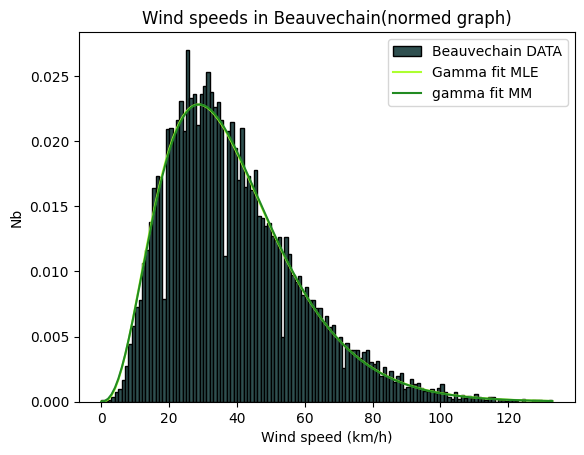

Comparing estimators for both methods (MM and MLE) for Elsenborn:
alpha (Method of moments): 3.6662526398561726
beta (Method of moments): 8.388039784372152
alpha (MLE): 3.705016224244196
alpha (MLE): 8.390079052835503



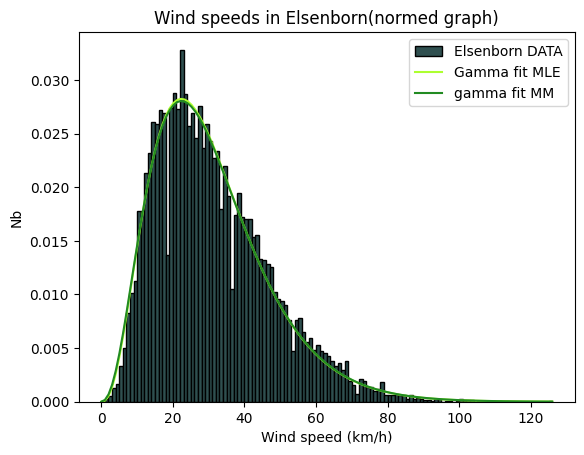

In [7]:
def Q6(array, place, distribution):

    #get the gamma distribution parameters with MLE
    #extract fitted gamma parameters
    i = 2
    if (distribution==stats.gamma): i = 0
    else: i = 1
    alpha, loc, scale = getDistributionParameters(array)[i]

    #takes the highest wind
    span = int(max(array))
    x = np.linspace(0, span, span)

    fig,ax = plt.subplots() # Instantiate figure and axes object
    ax.hist(array, bins=span, density=True, color='darkslategrey', edgecolor='black', label=f'{place} DATA')

    # Compute the value of the two moments
    M1 = np.mean(array)
    M2 = 0
    for i in array:
        M2 += i**2
    M2 = M2/len(array)

    # Compute gamma estimators from M1 and M2 
    alphaMM = M1**2 / (M2 - M1**2)
    betaMM = math.sqrt((M2 - M1**2)/alphaMM)

    pdfGammaMLE = distribution.pdf(x, a = alphaMM, scale = betaMM)
    pdfGammaMM = distribution.pdf(x, alpha, loc, scale)

    print("=====================================================================")
    print(f"Comparing estimators for both methods (MM and MLE) for {place}:")
    print(f"alpha (Method of moments): {alphaMM}")
    print(f"beta (Method of moments): {betaMM}")
    print(f"alpha (MLE): {alpha}")
    print(f"alpha (MLE): {scale}")
    print("=====================================================================\n")

    plt.plot(x,pdfGammaMLE, label="Gamma fit MLE", color='greenyellow')
    plt.plot(x,pdfGammaMM, label="gamma fit MM", color='forestgreen')
    plt.xlabel("Wind speed (km/h)")
    plt.ylabel("Nb") 
    plt.title(f"Wind speeds in {place}(normed graph)")
    plt.legend()
    plt.show()

Q6(WindBeauvechain, "Beauvechain", stats.gamma)
Q6(WindElsenborn, "Elsenborn", stats.gamma)

------------------------------------------------------------------------------------------------------

7.	Bootstrap 1000 times a sample of 500 daily speeds of wind for both wind farms and compute a 5% confidence interval for parameter(s) estimates for the best distribution of Question 4) modelling winds in Beauvechain. How do you interpret the results

------------------------------------------------------------------------------------------------------

In [8]:
import random as rn

def Q7(array, place):

    #only keep 500 wind speeds
    winds = array[:500]

    #number of bootstrappings
    M = 1000

    #arrays that will contain the gamma parameters for each resample
    alpha = []
    beta = []

    #take the wind speed sample, shuffle it and then estimate the parameters with an MLE
    for m in np.arange(0,M):
        datm = rn.choices(population=winds,k=len(winds))
        params = stats.gamma.fit(data=datm,scale=1)
        alpha.append(params[0])
        beta.append(params[2])


    alpha = np.sort(alpha)
    beta = np.sort(beta)

    #taking the lower and upper bounds of the 5% confidence interval
    alpha_begin = alpha[25]
    alpha_end = alpha[974]

    beta_begin = beta[25]
    beta_end = beta[974]

    print("=====================================================================")
    print(f"{place} :")
    print("Aplha 5% confidence interval: [",alpha_begin,":",alpha_end,"]")
    print("Beta 5% confidence interval: [",beta_begin,":",beta_end,"]")
    print("=====================================================================\n")

Q7(WindBeauvechain, "Beauvechain")
Q7(WindElsenborn, "Elsenborn")

Beauvechain :
Aplha 5% confidence interval: [ 2.9397667743185734 : 6.5992133561835224 ]
Beta 5% confidence interval: [ 6.8206280657905225 : 11.324601595664852 ]

Elsenborn :
Aplha 5% confidence interval: [ 2.080822489567262 : 3.5364510817095405 ]
Beta 5% confidence interval: [ 10.604597784365868 : 15.754111711799858 ]



Comment briefly your results:

As we can see, the parameters obtained in question 4 are indeed within the confidence intervals we just found. With the exception of the beta parameter for the Elsenborn farm where it is lower than what we would have expected according to the confidence intervals. 





------------------------------------------------------------------------------------------------------

8.	Let us denote by X the wind speed observed at Beauvechain on a day of the year. The winds observed over 30 days are denoted by (X1,…,X30). They are realizations of X, a random variable with the distribution fitted in Question 4. If M=max{ X1,…,X30},  

•	find the statistical law of M (equation requested, hint use the cdf of X) 

•	plot the pdf and cdf of M. 

•	Determine the wind value, p5, such that  P(M>p5)=95%.


------------------------------------------------------------------------------------------------------

Comment briefly your results:

Let's look for the CDF of Xn being Max over X : 

    F(X = Max) = P(x <= X) = P(X1 <= x)). P(X1 <= x)) ... P(X30 <= x))
        = F(x)**n

    => f(X = max) = (F(x)**n)' = n . F(x)**(n-1) . f(x)

Satistical Law : 

    To calculate the probability of Xn being M, we calculate first the probability of Xk being smaller than Xn. This is matching the integral of Gamma from 0 to Xn. This is therefore the CDF of gamma evaluated in Xn. 
    As there are 29 other value than Xn, the probability of Xn being a maximum is the gamma CDF evaluate in Xn power 29. 



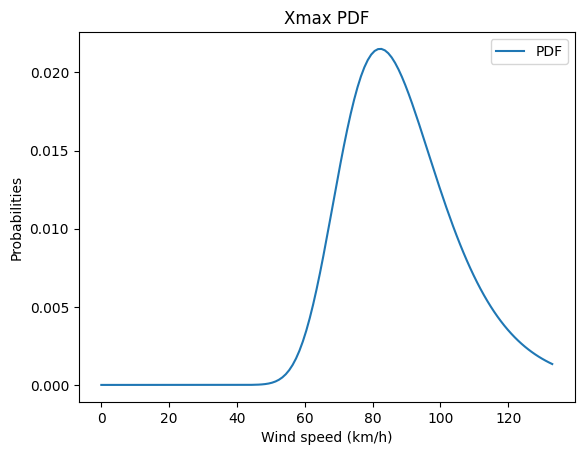

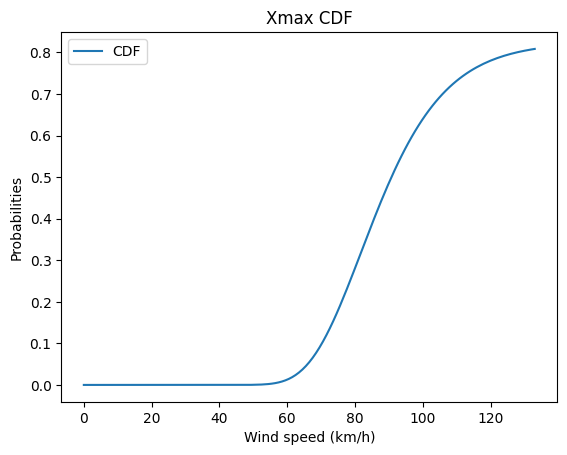

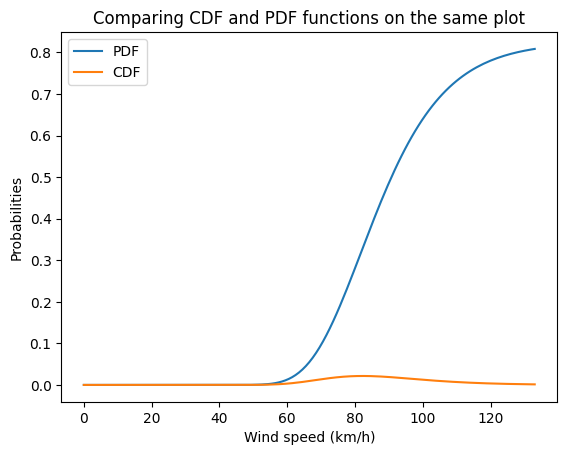

The value p5 such that P(M>p5)=95%:
p5 = 12.864524942492853



In [9]:
#get the gamma distribution parameters
alpha, loc, scale = getDistributionParameters(WindBeauvechain)[0]

#takes the highest wind
span = int(max(WindBeauvechain))
x = np.linspace(0, span, span)

# Compute the value of the two moments
M1 = np.mean(WindBeauvechain)
M2 = 0
for i in WindBeauvechain:
    M2 += i**2
M2 = M2/len(WindBeauvechain)

# Compute gamma estimators from M1 and M2 
alpha = M1**2 / (M2 - M1**2)
beta = math.sqrt((M2 - M1**2)/alpha)

span = int(max(WindBeauvechain))
x = np.linspace(0, span, span)

gamma_pdf = stats.gamma.pdf(x , a = alpha, scale = beta)

#compute M pdf 
M_PDF = 30*((np.cumsum(gamma_pdf))**29) * gamma_pdf
M_CFD = (np.cumsum(M_PDF))

fig1, ax1 = plt.subplots()
ax1.plot(x, M_PDF)
ax1.set_title("Xmax PDF")
plt.xlabel("Wind speed (km/h)") 
plt.ylabel("Probabilities") 
plt.legend(['PDF'])
plt.show()

fig2, ax2 = plt.subplots()
ax2.plot(x, M_CFD)
ax2.set_title("Xmax CDF")
plt.xlabel("Wind speed (km/h)") 
plt.ylabel("Probabilities") 
plt.legend(['CDF'])
plt.show()

fig3, ax3 = plt.subplots()
ax3.plot(x, M_CFD)
ax3.plot(x, M_PDF)
ax3.set_title("Comparing CDF and PDF functions on the same plot")
plt.xlabel("Wind speed (km/h)") 
plt.ylabel("Probabilities") 
plt.legend(['PDF', 'CDF'])
plt.show()

Percentil = stats.gamma.ppf([0.05, 0.95],alpha, 0, beta) #put in an array the value for 5% and 95%

print("=====================================================================")
print(f"The value p5 such that P(M>p5)=95%:\np5 = {Percentil[0]}")
print("=====================================================================\n")
